# Abhishek Gupta

# Data Science and Business Analytics Intern @ The Sparks Foundation

# Task #5 : Exploratory Data Analysis : Sports (Indian Premier League)

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data Loading
deliveries_data=pd.read_csv('deliveries.csv')
print('Deliveries Data lodaded successfully')

deliveries_data.head()

Deliveries Data lodaded successfully


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
match_data=pd.read_csv('matches.csv')
print('Match Data Loaded SuccessFully')

match_data.head()

Match Data Loaded SuccessFully


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
match_data=match_data.drop(['umpire3'],axis=1)
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

# Analysing The Data

In [6]:
#Total Number of matches wins by each team in each season
wins=match_data.groupby('season')['winner'].value_counts()
wins

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

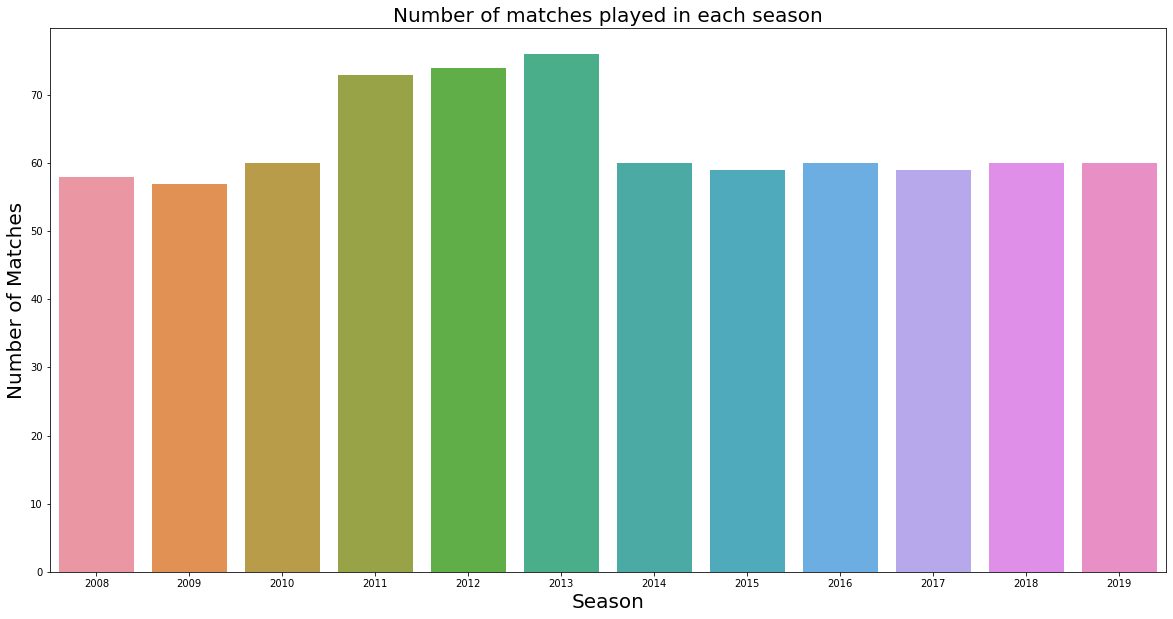

In [7]:
#Number of matches played in each season
plt.figure(figsize=(20,10))
sns.countplot('season',data=match_data)
plt.title("Number of matches played in each season",fontsize=20)
plt.xlabel("Season",fontsize=20)
plt.ylabel('Number of Matches',fontsize=20)
plt.show()

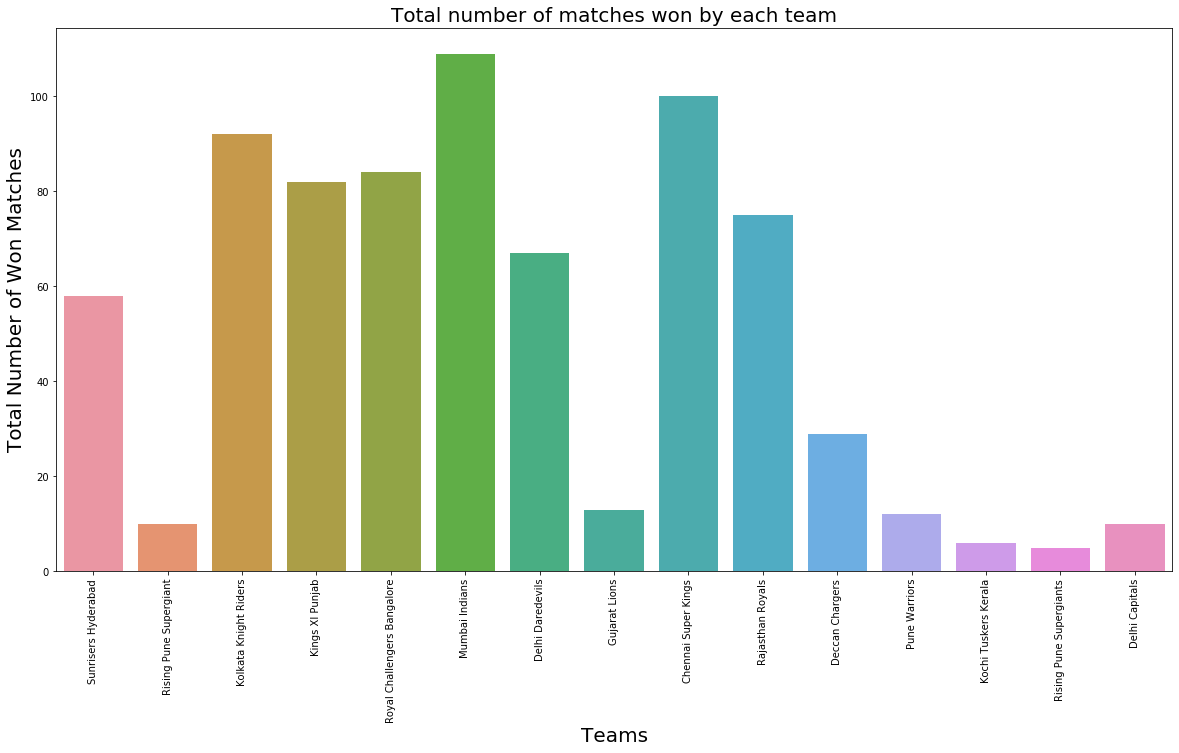

In [8]:
#Total number of matches won by each team
plt.figure(figsize=(20,10))
sns.countplot('winner',data=match_data)
plt.title("Total number of matches won by each team",fontsize=20)
plt.xlabel("Teams",fontsize=20)
plt.ylabel('Total Number of Won Matches',fontsize=20)
plt.xticks(rotation=90)
plt.show()

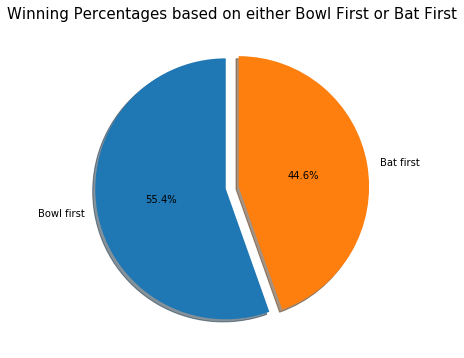

In [9]:
#Winning Analysis
plt.figure(figsize=(12,6))
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')
match_data['win_by'].value_counts()
temp=match_data['win_by'].value_counts()
labels=temp.index
xdata=temp.values
colors=['#DD8452','#C44E52']
plt.pie(x=xdata,labels=labels,autopct="%.1f%%",pctdistance=0.5,explode=[0.05,0.05],startangle=90,shadow=True)
plt.title('Winning Percentages based on either Bowl First or Bat First',fontsize=15)
plt.show()

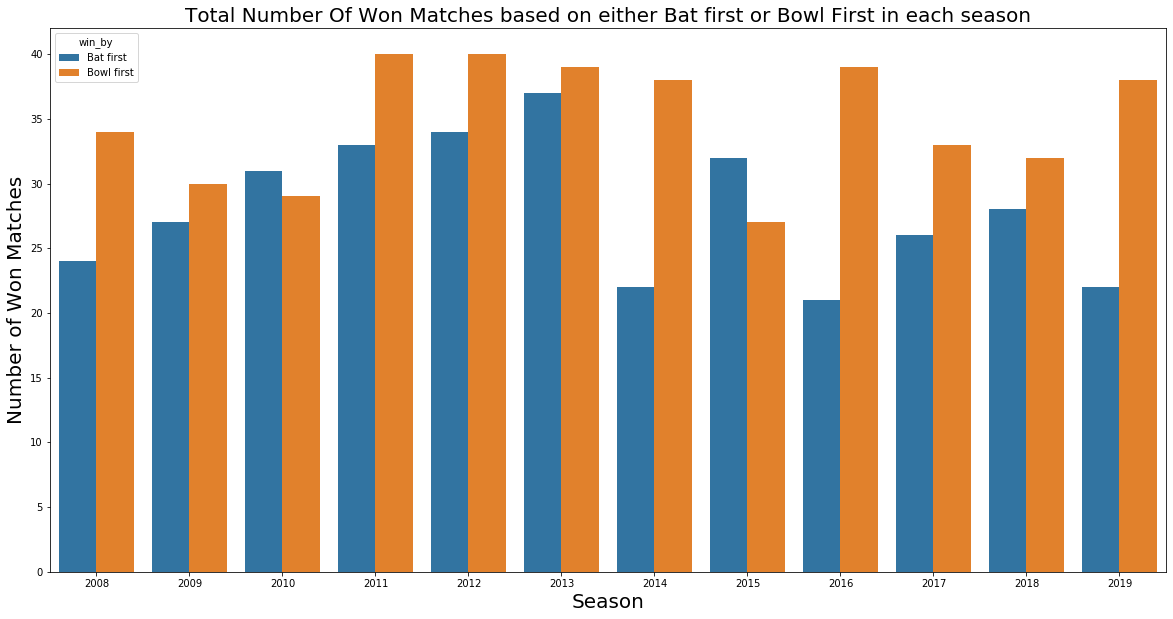

In [10]:
plt.figure(figsize=(20,10))
colors=['#DD8452','#C44E52']
sns.countplot('season',hue='win_by',data=match_data)
plt.title('Total Number Of Won Matches based on either Bat first or Bowl First in each season',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Number of Won Matches',fontsize=20)
plt.show()

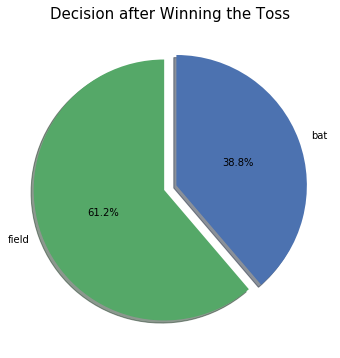

In [11]:
#Toss Analysis
plt.figure(figsize=(12,6))
temp=match_data['toss_decision'].value_counts()
labels=temp.index
xdata=temp.values
colors=['#55A868','#4C72B0']
plt.pie(x=xdata,labels=labels,autopct="%.1f%%",pctdistance=0.5,explode=[0.05,0.05],startangle=90,shadow=True,colors=colors)
plt.title('Decision after Winning the Toss',fontsize=15)
plt.show()

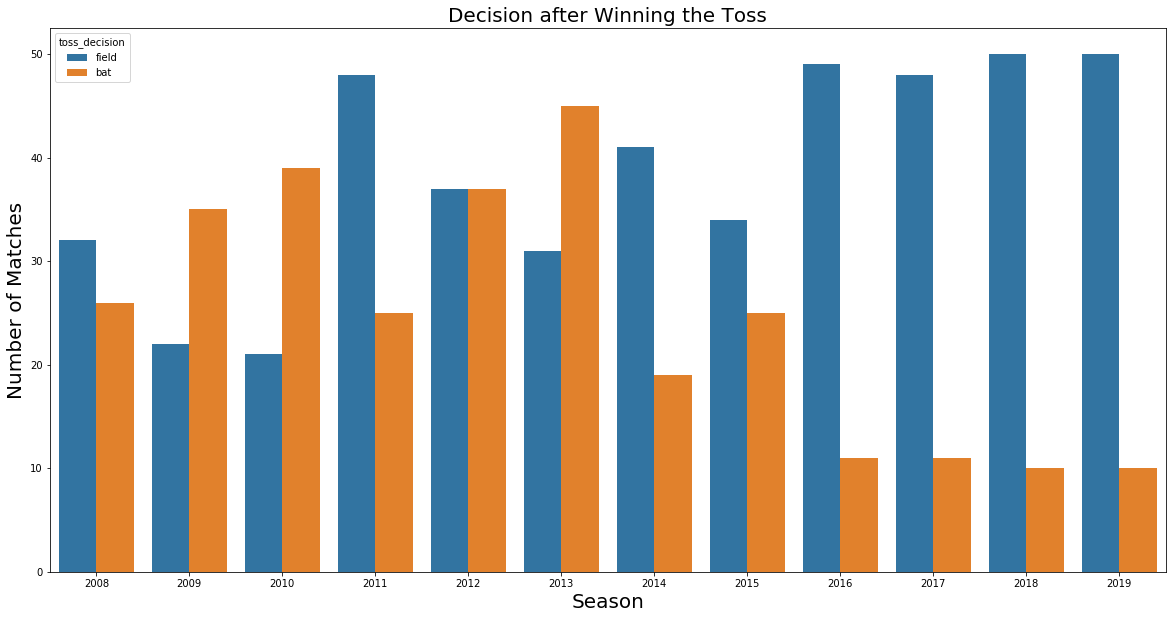

In [12]:
plt.figure(figsize=(20,10))
sns.countplot('season',hue='toss_decision',data=match_data)
plt.title('Decision after Winning the Toss',fontsize=20)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Number of Matches',fontsize=20)
plt.show()

In [13]:
#Final Match Analysis
#Winner Team in Finals
winner=match_data.drop_duplicates(subset=['season'],keep='last')
winner[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


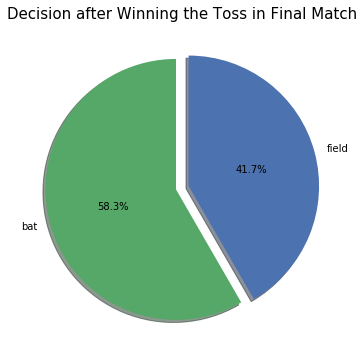

In [14]:
#Final Match Toss Analysis
plt.figure(figsize=(12,6))
temp=winner['toss_decision'].value_counts()
labels=temp.index
xdata=temp.values
colors=['#55A868','#4C72B0']
plt.pie(x=xdata,labels=labels,autopct="%.1f%%",pctdistance=0.5,explode=[0.05,0.05],startangle=90,shadow=True,colors=colors)
plt.title('Decision after Winning the Toss in Final Match',fontsize=15)
plt.show()

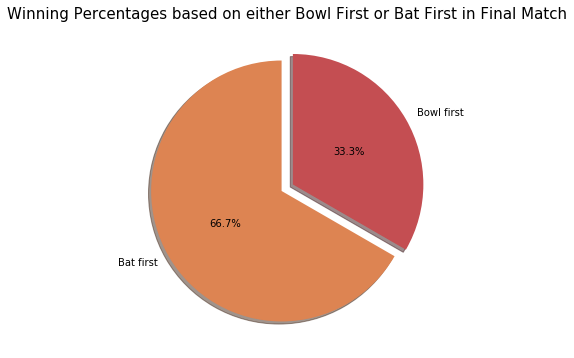

In [15]:
#Final Match Winning Analysis
plt.figure(figsize=(12,6))
temp=winner['win_by'].value_counts()
labels=temp.index
xdata=temp.values
colors=['#DD8452','#C44E52']
plt.pie(x=xdata,labels=labels,autopct="%.1f%%",pctdistance=0.5,explode=[0.05,0.05],startangle=90,shadow=True,colors=colors)
plt.title('Winning Percentages based on either Bowl First or Bat First in Final Match',fontsize=15)
plt.show()

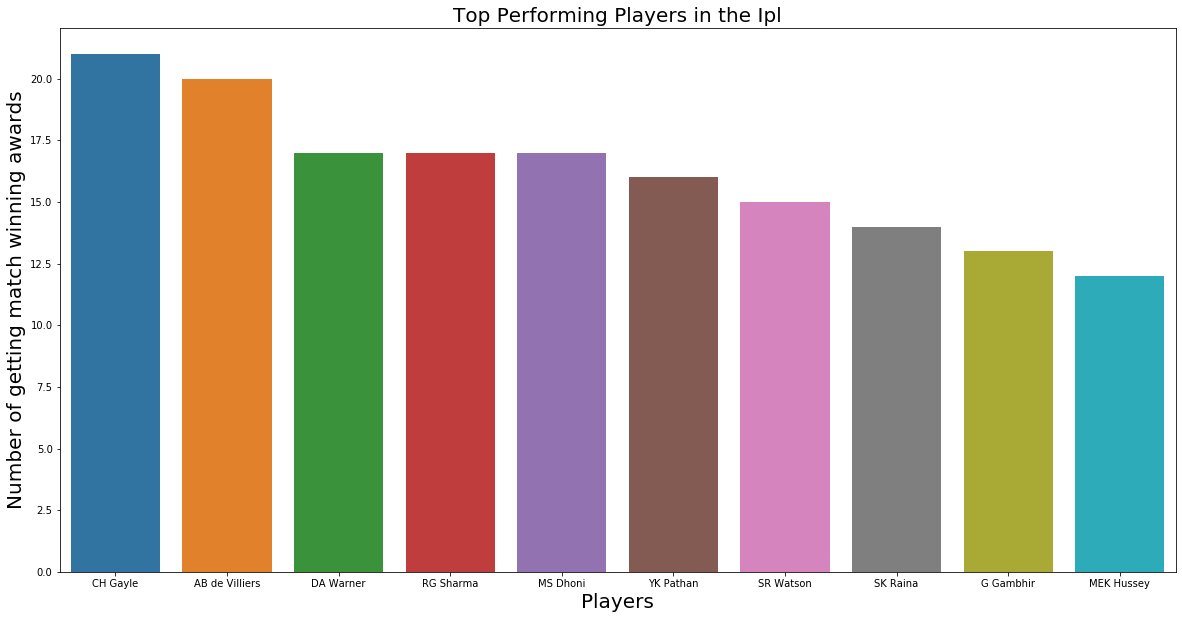

In [16]:
#Top Players in The Ipl
plt.figure(figsize=(20,10))
players=match_data['player_of_match'].value_counts()[:10]
sns.barplot(x=players.index,y=players)
plt.title('Top Performing Players in the Ipl',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('Number of getting match winning awards',fontsize=20)
plt.show()

In [17]:
#Final Match Venue and Winner Team
winner.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [18]:
winner['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

In [19]:
winner[['season','toss_winner','toss_decision','winner']].sort_values('season').reset_index(drop=True)

,season,toss_winner,toss_decision,winner
0,2008,Rajasthan Royals,field,Rajasthan Royals
1,2009,Royal Challengers Bangalore,field,Deccan Chargers
2,2010,Chennai Super Kings,bat,Chennai Super Kings
3,2011,Chennai Super Kings,bat,Chennai Super Kings
4,2012,Chennai Super Kings,bat,Kolkata Knight Riders
5,2013,Mumbai Indians,bat,Mumbai Indians
6,2014,Kolkata Knight Riders,field,Kolkata Knight Riders
7,2015,Chennai Super Kings,field,Mumbai Indians
8,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
9,2017,Mumbai Indians,bat,Mumbai Indians


In [20]:
#Player of the Match in Final 
winner[['season','player_of_match','winner']].sort_values('season').reset_index(drop=True)

,season,player_of_match,winner
0,2008,YK Pathan,Rajasthan Royals
1,2009,A Kumble,Deccan Chargers
2,2010,SK Raina,Chennai Super Kings
3,2011,M Vijay,Chennai Super Kings
4,2012,MS Bisla,Kolkata Knight Riders
5,2013,KA Pollard,Mumbai Indians
6,2014,MK Pandey,Kolkata Knight Riders
7,2015,RG Sharma,Mumbai Indians
8,2016,BCJ Cutting,Sunrisers Hyderabad
9,2017,KH Pandya,Mumbai Indians


In [21]:
#Total Number of Fours hit by each teams in the Ipl
four_data=deliveries_data[deliveries_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('fours','count')])

,fours
batting_team,
Chennai Super Kings,2193
Deccan Chargers,957
Delhi Capitals,242
Delhi Daredevils,2158
Gujarat Lions,460
Kings XI Punjab,2458
Kochi Tuskers Kerala,170
Kolkata Knight Riders,2434
Mumbai Indians,2588


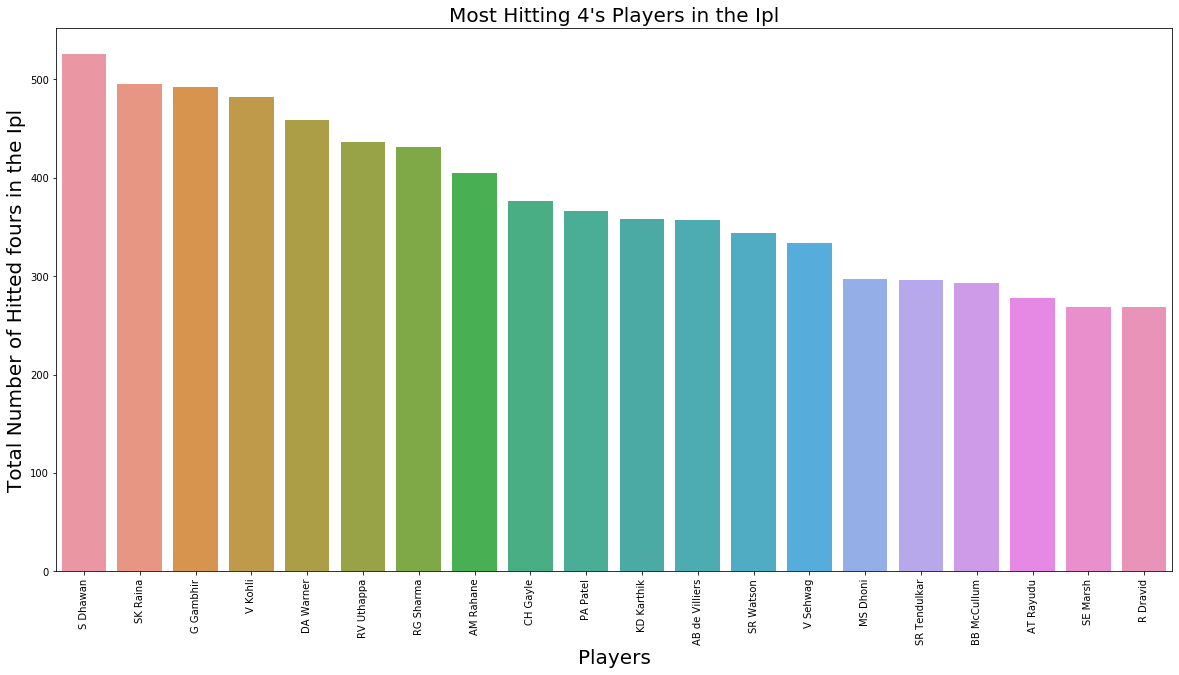

In [22]:
#Top 20 players who hit most Fours in the Ipl
plt.figure(figsize=(20,10))
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
top_20=batsman_four.iloc[:20,:]
sns.barplot(x=top_20['batsman'],y=top_20['four'])
plt.title("Most Hitting 4's Players in the Ipl",fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('Total Number of Hitted fours in the Ipl',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [23]:
#Total Number of Six hit by each teams in the Ipl
six_data=deliveries_data[deliveries_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('Six','count')])

,Six
batting_team,
Chennai Super Kings,973
Deccan Chargers,400
Delhi Capitals,87
Delhi Daredevils,801
Gujarat Lions,155
Kings XI Punjab,976
Kochi Tuskers Kerala,53
Kolkata Knight Riders,930
Mumbai Indians,1096


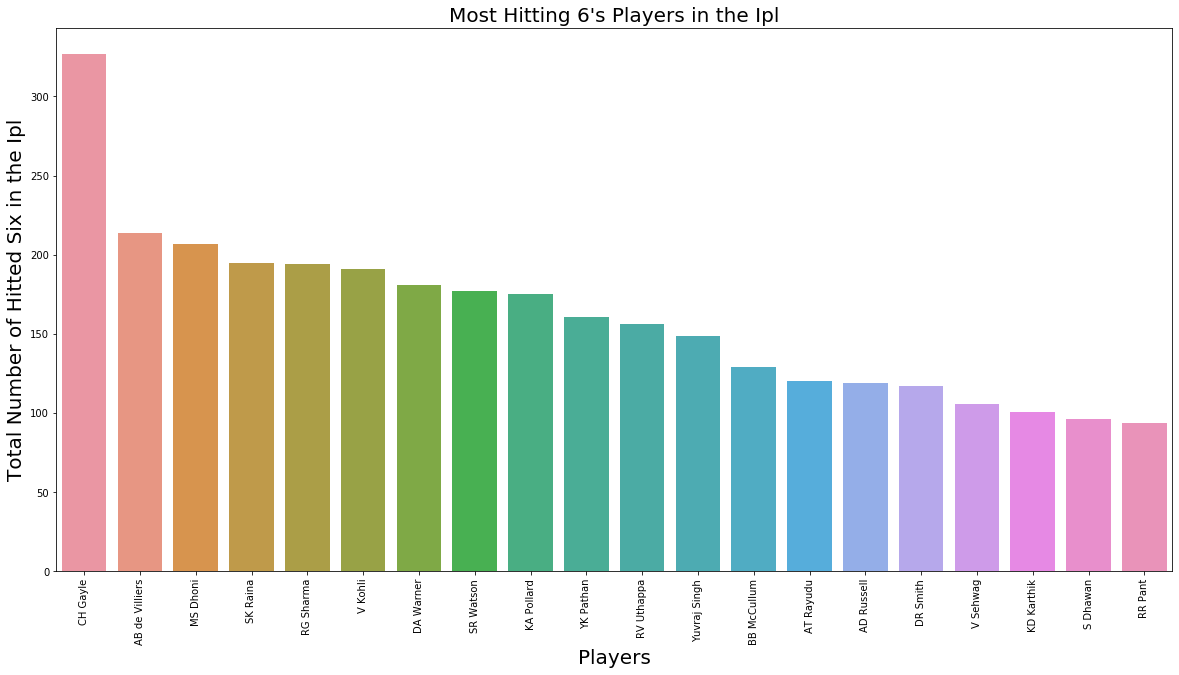

In [24]:
#Top 20 players who hit most Fours in the Ipl
plt.figure(figsize=(20,10))
batsman_four=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
top_20=batsman_four.iloc[:20,:]
sns.barplot(x=top_20['batsman'],y=top_20['six'])
plt.title("Most Hitting 6's Players in the Ipl",fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('Total Number of Hitted Six in the Ipl',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [25]:
#top 20 leading run scorer in IPL
batsman_score=deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:20,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [26]:
#top 20 players who played most ipl matches 
deliveries_data['player_dismissed'].value_counts()[:20]

SK Raina          162
RG Sharma         155
RV Uthappa        153
V Kohli           143
S Dhawan          137
G Gambhir         136
KD Karthik        135
PA Patel          126
AM Rahane         116
SR Watson         115
AT Rayudu         115
Yuvraj Singh      111
DA Warner         110
AB de Villiers    110
YK Pathan         110
CH Gayle          109
MS Dhoni          105
BB McCullum       104
V Sehwag           99
M Vijay            98
Name: player_dismissed, dtype: int64

In [ ]:
#Dismissal Kind
deliveries_data['dismissal_kind'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot('dismissal_kind',data=deliveries_data)
plt.title('Dismissal kind in Ipl',fontsize=20)
plt.xlabel('Dismissal Kind',fontsize=20)
plt.ylabel('Number of Dismissal',fontsize=20)
plt.show()

In [ ]:
#Top Bowlers in The IPL
plt.figure(figsize=(20,10))
wicket=deliveries_data.dropna(subset=['dismissal_kind'])
wicket=wicket[~wicket['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket=wicket.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True)
top_20=wicket.iloc[:20,:]
sns.barplot(x=top_20['bowler'],y=top_20['count'])
plt.title("Most Wicket Taking Players in the Ipl",fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('Total Number of Wickets Taken in the Ipl',fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Final Conclusion

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out .

The IPL most wicket taken blower is SL Malinga.

Thank You!